In [1]:
from plotnine import *
import pandas as pd
import numpy as np

In [5]:
time = "2024-03-14_14:51"
time = "2024-03-14_15:32"
time = "2024-03-14_17:26"
time = "2024-03-14_18:18"
time = "2024-03-14_19:00"
# time = "2024-03-14_20:08"
time = "2024-03-15_10:31"
time = "2024-03-15_13:27"
time = "2024-03-15_15:44"
time = "2024-03-15_16:27"
time = "2024-03-16_13:35"
time = "2024-03-18_09:34"
# time = "2024-03-18_16:10"
# time = "2024-03-19_00:56"
# time = "2024-03-20_04:35"
time = "2024-03-20_08:28"
time = "2024-03-20_13:00"
time = "2024-03-21_07:59"
# time = "2024-03-21_10:50"
time = "2024-03-21_20:28"
time = "2024-03-21_21:59"
time = "2024-03-22_19:23"
# time = "2024-03-23_02:14"
time = "2024-03-23_07:49"
time = "2024-03-25_01:47"

# time = "2024-03-29_04:53"
time = "2024-03-29_07:23"
time = "2024-03-31_15:54"
time = "2024-03-31_16:37"
time = "2024-03-31_17:12"


df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

# df['test_cumsum_annualized_return'] = df['test_cumsum_annualized_return'] * -1
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["window"] < 5]
# df = df[df["random_state"] == 42]
# df = df[df["test_size"] == 2880]
# df = df[df["n_clusters"] == 100]
# df = df[df["log_return_threshold"] <= 0.01]
df = df[df["test_negative_sharpe_ratio"] >= 0.5]

df

,window,train_sum_annualized_return,train_sum_actual_return,train_n_trades,test_sum_annualized_return,test_sum_actual_return,test_n_trades,train_cumsum_annualized_return,train_cumsum_actual_return,train_sharpe_ratio,test_cumsum_annualized_return,test_cumsum_actual_return,test_sharpe_ratio,test_negative_sharpe_ratio,n_clusters,train_size,test_size,random_state
0,0,1.14,114,349,-0.16,-16,54,1.14,114,3.934711,-0.16,-16,-0.730306,0.608103,80,4800,960,33
1,1,1.29,129,347,-0.07,-7,72,2.43,243,3.934711,-0.23,-23,-0.730306,0.608103,80,4800,960,33
2,2,1.10,110,343,-0.18,-18,52,3.53,353,3.934711,-0.41,-41,-0.730306,0.608103,80,4800,960,33
3,3,1.57,157,319,-0.15,-15,65,5.10,510,3.934711,-0.56,-56,-0.730306,0.608103,80,4800,960,33
4,4,1.44,144,314,-0.47,-47,92,6.54,654,3.934711,-1.03,-103,-0.730306,0.608103,80,4800,960,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10327,16,1.34,134,332,-0.16,-16,59,23.95,2395,3.508486,-2.45,-245,-0.724706,0.619748,80,4800,960,21
10328,17,2.09,209,408,0.08,8,70,26.04,2604,3.508486,-2.37,-237,-0.724706,0.619748,80,4800,960,21
10329,18,1.88,188,369,0.10,10,69,27.92,2792,3.508486,-2.27,-227,-0.724706,0.619748,80,4800,960,21
10330,19,2.11,211,384,-0.08,-8,83,30.03,3003,3.508486,-2.35,-235,-0.724706,0.619748,80,4800,960,21


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


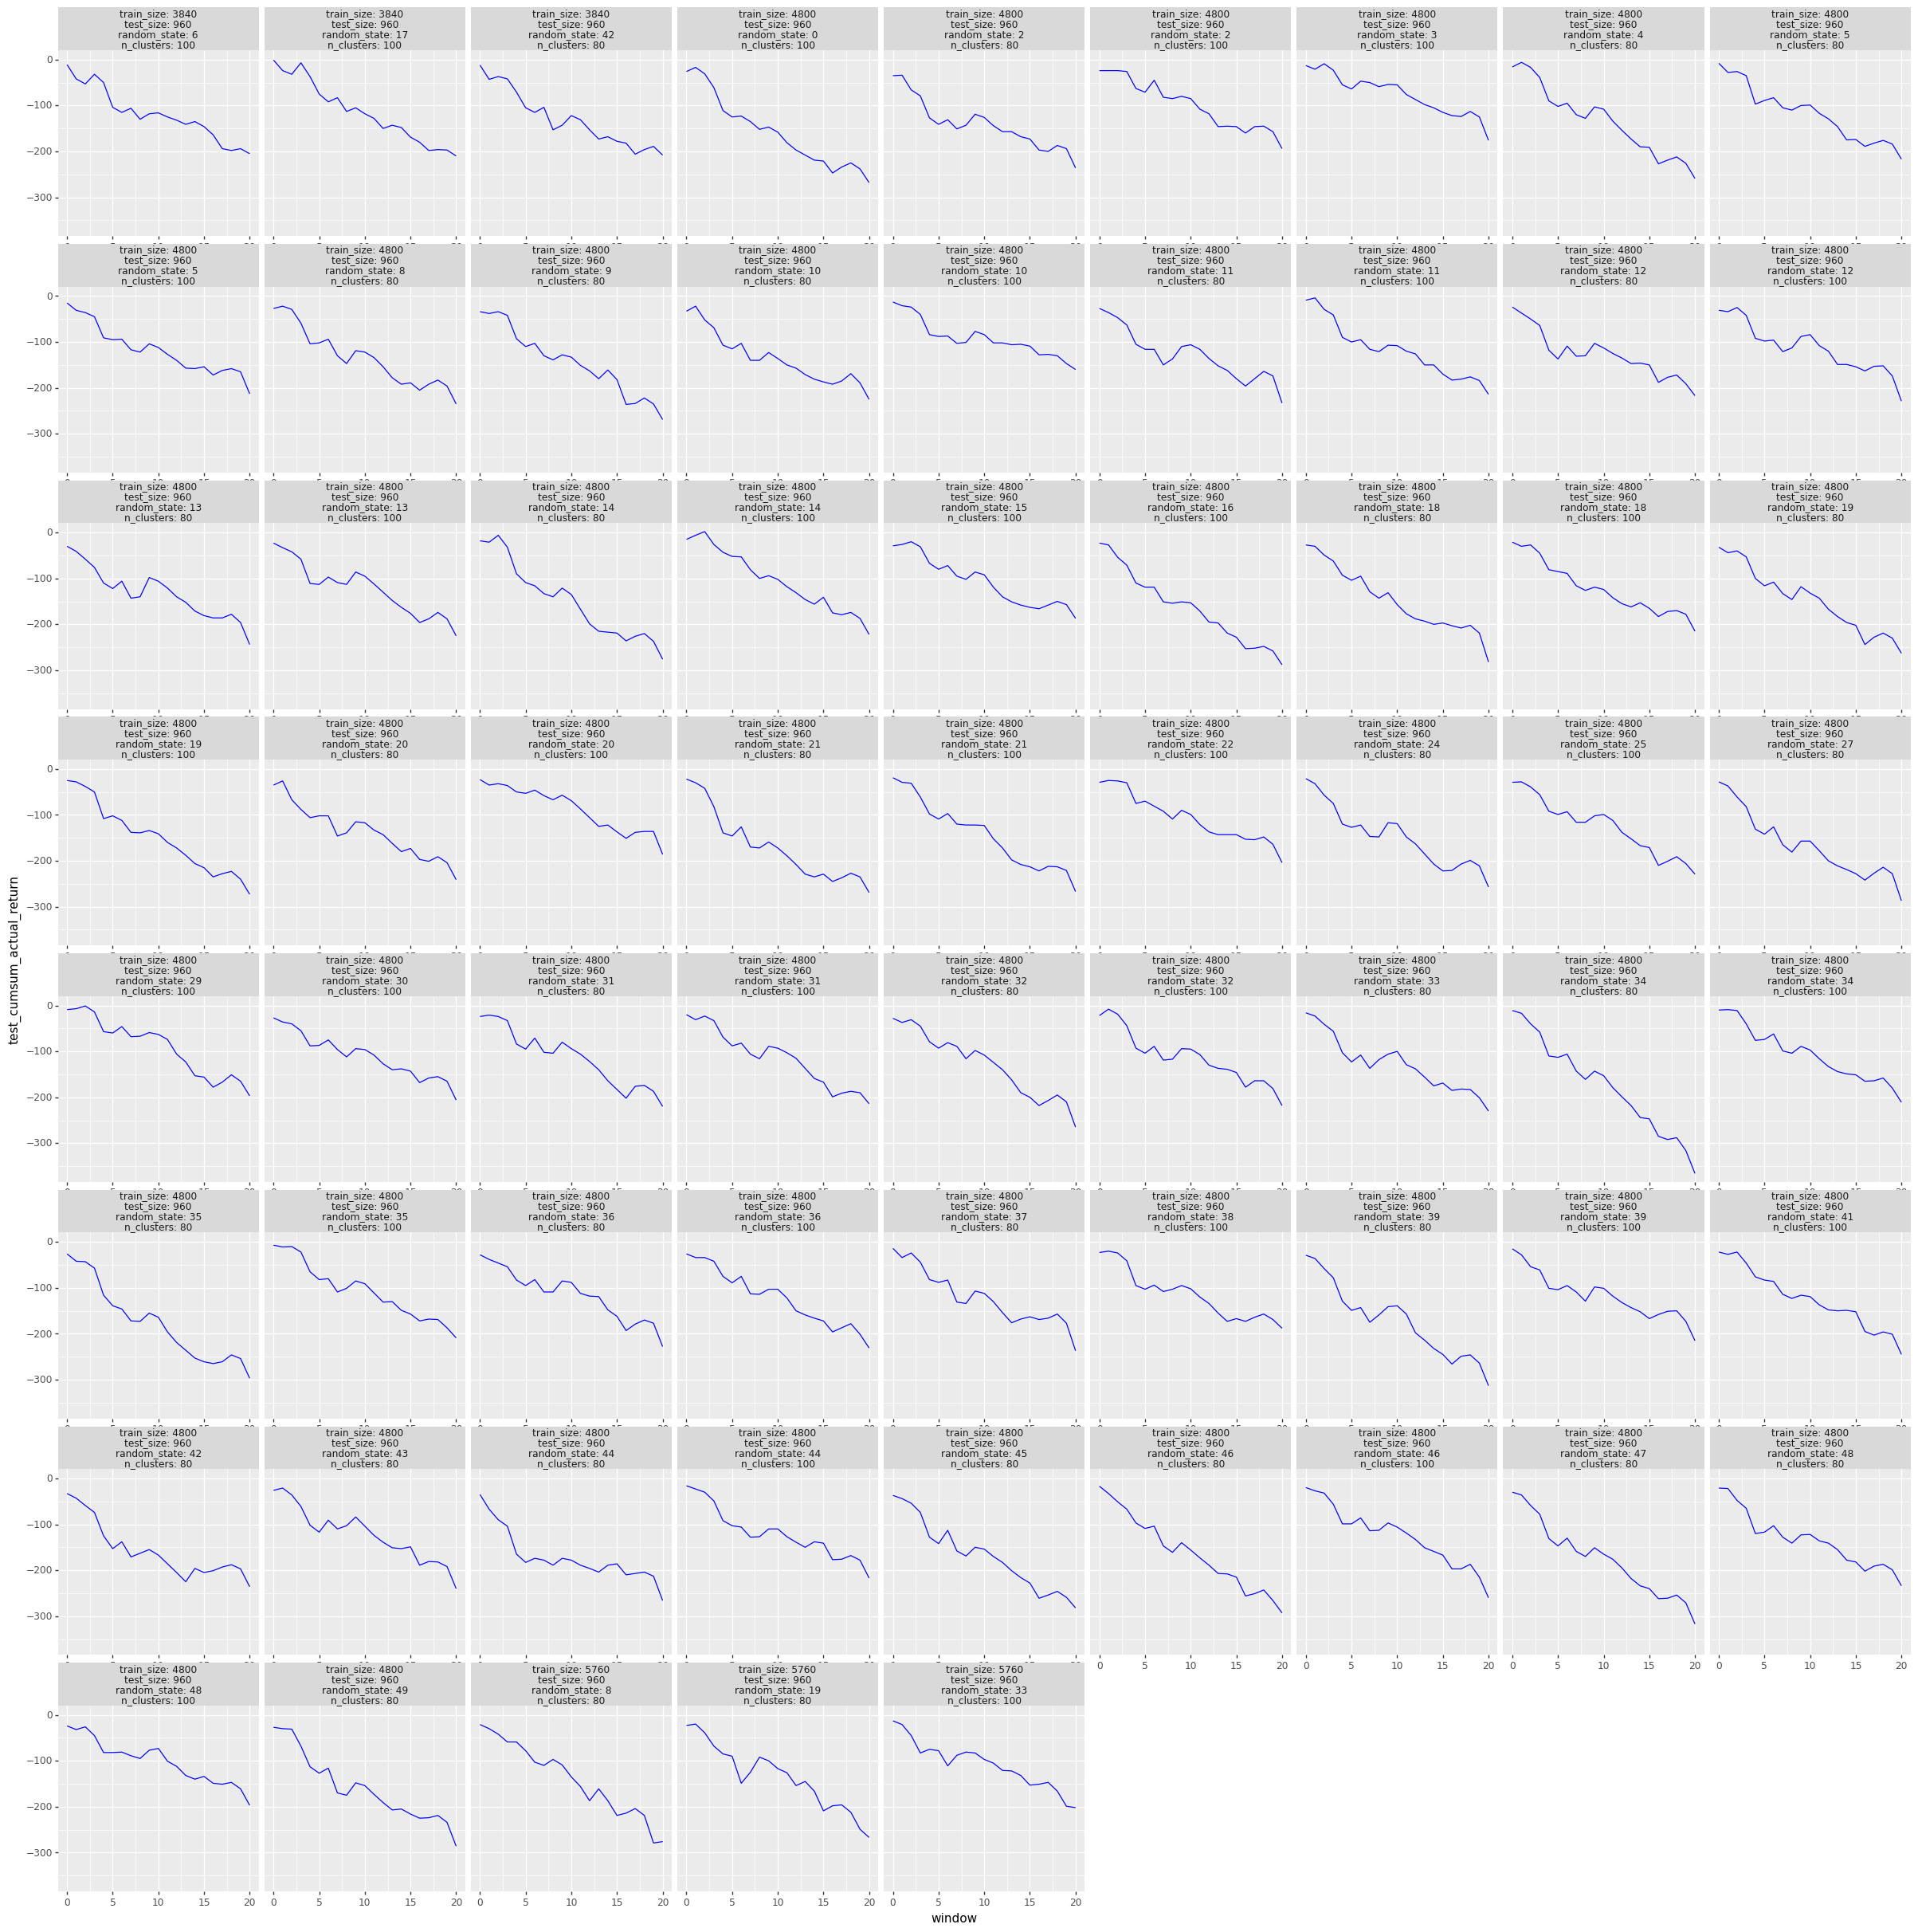

In [7]:
p = ggplot(df)
# p = p + geom_line(aes(x="window", y="train_cumsum_annualized_return"), color="red")
p = p + geom_line(aes(x="window", y="test_cumsum_actual_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_avg_calmar_ratio"), color="red")
# p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
p = p + facet_wrap("~train_size + test_size + random_state + n_clusters", scales="free_x", labeller="label_both")
p = p + theme(figure_size=(30, 30))
# p = p + theme(figure_size=(10, 10))
print(p)

In [ ]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)

In [ ]:
4 * 24 * 20